Title: WIDS Palm Oil Plantation Prediction

Date : February  2019

Plan:

**First things First: snacks and chip checked, Coffee checked**

  1- Introduction
  
    - Data Field and Description
    
  2 -  Importing Libraries
    
  3 - Explore the dataset
    
    - Feature exploration and Cleaning
    
  4- Training using Convolution Neural Networks


# Introduction: 

This competiton touches on one of the major agricultural problems facing many Palm oil producing countries-  Deforestaion, biodiversity loss and Increase Green house emission.

Palm oil (Elæis guineensis) is the main cooking ingredient in the most tropical parts of the world like  Brazil, South East Asia and tropical part of Africa(particularly in Cameroon where i grew up). Extracted from the pulp of the fruit, this staple has so many uses and virtues. 

**To the Health:**

* Palm oil reduces cholestorol levels and some stusdies have found that palm oil can reduce the amount of bad LDL cholesterol in our body, keeping the hearts healthy and strong. Which brings us to the second virtue
* It slows the progression of Heart diseases
* Boosts Brain Health as it is jam-packed with a from of Vitamin E(tocotienol)  which has beneficial effects on brain health, skin and hair health too.
* Plam oil is an excellent source of the Vitamin A supplement -Beta-Carotene, whihc is important for maintaining good eye health, Also beneficial to pregnant women and their babies. ( Just a little anecdote: In my Country Cameroon, whenever an old women sees you wearing prescription eyeglasses, she will tell you "Come on!!! Take that thing off your eyes and consume more Palm oil". Happens to me all the time :') )
* Palm oil is high in beneficial antioxidant, which has been shown to reduce inflammation and Oxidative stress caused by free radicals.

**Additionally:**
 * It is also the cheapest vegetable oil in the world
 * Plam oil also produces palm kernel oil extracted from the endosperm which is mainly used in the cosmetics industry.  
 * Palm kernel waste (after the oil has beenextracted) is also used as animal feed and in co-firing in electricity generation.
 * it also has a natural preservative effect which extends the shelf life of food products That is why it is about half the package products sold in our grocery stores. From shampoo to detergents, to lipsticks, to bread, to cookies and even our Biodiesels, palm oil is present everywhere.
 
 **BUT BUT BUT.....** 
 * Plam oils cultivation is responsible for direct damage to flora and wildlife habitats due to forest conversion and the influx of palm oil workers increases pressure on wildlife through hunting .
 * Plam oils deforestation as a result of forest being destroyed, to keep up with the growing demands for palm oil, hence increasing greeenhouse gas emissions.
 * Palm oil production has major negative environmental consequences on soils (erosion potential on steep slopes) and water quality (pollution by pesticide run-off).
 * There has also been reports of Human rights violations by coorporations and companies that produce palm oil. Some of the issues incude, unsafe working conditions for the workers, Very low pay etc.
 
Despite the positive impacts and vitues of palm oil, its expansion has led to deforestation, increased carbon emissions, and biodiversity loss,.
 
# About the Challenge:

The challenge is to create a model that predicts the presence of oil palm plantations in satellite imagery. The datathon task is to train a model that takes as input a satellite image and outputs a prediction of how likely it is that the image contains an oil palm plantation. 

The dataset images are 3-meter spatial resolution, and each is labeled with whether an oil palm plantation appears in the image (0 for no plantation, 1 for any presence of a plantation).

Labeled training and test datasets are provided for model development.

# sOurce:
* https://news.mongabay.com/2016/04/palm-oil-cameroon-blessing-curse-small-scale-farmers-2/
* http://awsassets.panda.org/downloads/palmoildevelopmentcameroon_english.pdf
* https://www.excelvite.com/red-palm-oil-benefits-the-heart-brain-but-is-it-bad-for-the-environment/

**Data Fields and Description:**

**image_id** - an anonymous id unique to a given image.

**has_oilpalm** - the annotation or label for a given image, with 0 indicating no oil palm, and 1 indicating presence of oil palm plantations.

**score** - confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result. For more details on how these scores are calculated, visit this article. Please note that this is extra data that need not be incorporated in your model, but may be useful. In addition, stay tuned for a blogpost focused more deeply on the data annotation process and more!

# 1- Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Loading and Reading data

In [2]:
#Loading the images paths
img_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train')
img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')
img_holdout_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data\valid_set')

In [3]:
#oading the .csv file
data = pd.read_csv(r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\traininglabels (1).csv")
data.sample(5)

,image_id,has_oilpalm,score
2667,img_038382017.jpg,0,1.0
12484,img_072432018.jpg,0,1.0
2066,img_029952017.jpg,0,1.0
8339,img_012092018.jpg,0,1.0
827,img_012062017.jpg,0,1.0


# 3 - Data Preprocessing

In [4]:
data.describe()

,has_oilpalm,score
count,15244.000000,15244.000000
mean,0.061795,0.955769
std,0.240790,0.109367
min,0.000000,0.388700
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [5]:
data['has_oilpalm'].value_counts(normalize = True)

0    0.938205
1    0.061795
Name: has_oilpalm, dtype: float64

In [6]:
print(data.shape)

(15244, 3)


In [7]:
data['score'].value_counts(normalize = True)

1.0000    0.834623
0.8000    0.001706
0.7992    0.001181
0.7981    0.001115
0.7976    0.000984
0.7974    0.000984
0.7969    0.000918
0.7982    0.000918
0.7979    0.000918
0.8112    0.000853
0.8053    0.000787
0.8018    0.000787
0.7986    0.000787
0.8027    0.000722
0.8025    0.000722
0.8041    0.000722
0.7966    0.000722
0.8033    0.000722
0.7949    0.000722
0.8003    0.000722
0.7993    0.000656
0.7995    0.000656
0.8019    0.000656
0.7988    0.000656
0.8028    0.000656
0.7999    0.000656
0.6000    0.000656
0.7959    0.000656
0.8054    0.000656
0.7991    0.000656
            ...   
0.6290    0.000066
0.6164    0.000066
0.8387    0.000066
0.8319    0.000066
0.4295    0.000066
0.8320    0.000066
0.8357    0.000066
0.4051    0.000066
0.8253    0.000066
0.8217    0.000066
0.8367    0.000066
0.8290    0.000066
0.4155    0.000066
0.6266    0.000066
0.6215    0.000066
0.8211    0.000066
0.4222    0.000066
0.7823    0.000066
0.7730    0.000066
0.8130    0.000066
0.8413    0.000066
0.6203    0.

OBSERVATION:
- There are about 15 244 images with an equal number of score and max of 1 signifies that there is an oil palm while a 0 means no oil palm.

- There are non Null of NaN columns since the number of 'counts' are equivalent

- This dataset is very biase. 93 percent of the images does not have oilpalms while only 6 percent has oilpalms. Same with the scores, 83 percent of all scores are 1 while the remaining scores are about 16 percent.


# We will come back to the training label later. Lets take a look at the training image dataset.

To ease the image reading process we can create a aditional column to the dataset with the global path of the images

In [8]:
data['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in data['image_id']]
data.head()

,image_id,has_oilpalm,score,image_path
0,img_000002017.jpg,0,0.7895,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
1,img_000012017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
2,img_000022017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
3,img_000072017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
4,img_000082017.jpg,0,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...


In [9]:
#Lets take a look at some of the oil palm satellite images
random_images = np.random.choice(data['image_path'],5)
random_images  

array(['C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_083552017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_029502017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_007952018.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_009702018.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_053732018.jpg'],
      dtype=object)

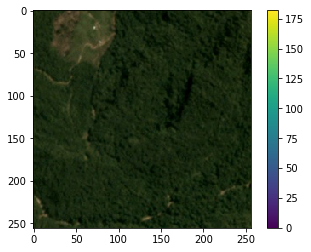

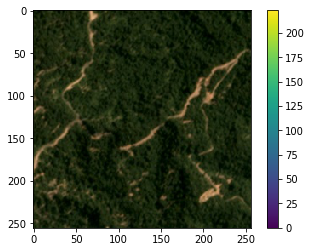

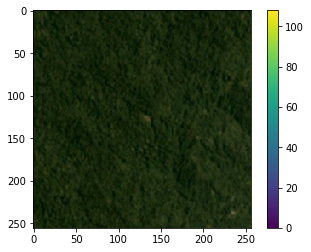

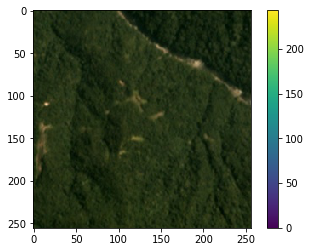

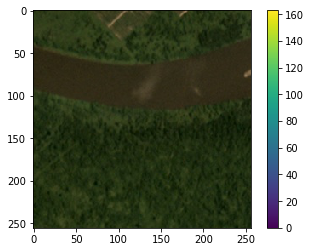

In [10]:
from PIL import Image
for i in random_images:
    img  = Image.open(i)
    plt.imshow(img)
    plt.colorbar()
    plt.show()

# 4- Image Classification using Convolution Neural Network

**Image classification using CNN is always done in 3 parts**

1. Convolution:
2. Pooling
3. Flatenning
4. Full Connection

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential       

from keras.layers import Conv2D           

from keras.layers import MaxPooling2D

from keras.layers import Flatten

from keras.layers import Dense
 

Using TensorFlow backend.


**Explanations:**

**Step 1** - To initialise our neural network as a sequential network

**Step 2** - To perform the convolution operation on the training inmage. 2D becasue we are working with images, which are basically 2D arrays.

**Step 3** - Used for pooling operations- simplifies the image collected by the convolutional layer and creates a condensed version of the information contained in them.

**Step 4** - Used for flettening the convolutional array. Flatteening is the process of converting the 2D arrays into single linear continuous array.

**Step 5** - To perfrom the ful connnection stated above

In [12]:
# We create an object of the sequential class
model = Sequential()

In [13]:
# Step 1- Convolution step:
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

This step takes 4 parameters: 

* 32 is the number of filters.

* (3,3) is the shape of each filter.

* input_shape our cnn will take = (64, 64, 3) - 64 by 64 resolution and 3 for RBG color image.

* 'Relu' recifier funtion will be our activation function

In [14]:
# Step 2- Pooling step:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [15]:
# Step 3 - Flattening
model.add(Flatten())

In [16]:
#step 4 - Full connection
model.add(Dense(128, activation = 'relu'))

Dense is the function to add a fully connected layer. The unit(in this case 128) is the number of nodes that should be present in the hidden layer. We will treak it until we get the optimal unit

Since we are dealing with a Binary classification problem( either hasoilpalm or not), We will initialise our output layer so that it has just a single node.

In [17]:
# Initialising output node
model.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
# Now we compile our CNN
learning_rate = .001
from keras.optimizers import RMSprop

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),   #Try adam  next and see how it goes
              metrics=['accuracy'])

# 5- Training the CNN to the images

 **Image Preprocessing**

In [24]:
from keras.preprocessing.image import ImageDataGenerator

#train set

train_generator = ImageDataGenerator(rescale = 1./255)
train_set = train_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images',
    target_size = (64, 64),
    batch_size = 500,
    class_mode = 'binary',
    shuffle=True,
    seed = 42
)
 

Found 15244 images belonging to 1 classes.


In [25]:
#validation set

valid_generator = ImageDataGenerator(rescale = 1./255)
valid_set = valid_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data',
    target_size = (64, 64),
    batch_size = 500,
    class_mode = 'binary',
    shuffle=True,
    seed = 42
)
 
#test set

test_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data',
    target_size = (64, 64),
    batch_size = 500,
    class_mode = 'binary',
    shuffle=True,
    seed = 42
)


Found 2178 images belonging to 1 classes.
Found 4356 images belonging to 1 classes.


In [26]:
# from keras import utils

# num_classes = 2
# train_set = utils.to_categorical(train_set, num_classes)
# #valid_set = utils.to_categorical(valid_set, num_classes)


**Fitting the images**

In [ ]:
STEP_SIZE_TRAIN=train_set.n//train_set.batch_size

STEP_SIZE_VALID=valid_set.n//valid_set.batch_size

history = model.fit_generator(train_set,
            steps_per_epoch=STEP_SIZE_TRAIN,
            epochs = 5,
            validation_data = valid_set,
            validation_steps=STEP_SIZE_VALID)

Epoch 1/5
30/30 [==============================] - 79s 3s/step - loss: 0.0000e+00 - acc: 0.0544 - val_loss: 0.0000e+00 - val_acc: 0.0715
Epoch 2/5
30/30 [==============================] - 78s 3s/step - loss: 0.0000e+00 - acc: 0.0532 - val_loss: 0.0000e+00 - val_acc: 0.0703
Epoch 3/5
21/30 [====================>.........] - ETA: 21s - loss: 0.0000e+00 - acc: 0.0559

In [ ]:
Observation:
- We can see that the images fall in the range 0 - 255

Referencec:
- https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://www.kaggle.com/jhonatansilva31415/whales-a-simple-guide